# 下載特定的台股歷史股價，並存成檔案

In [1]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

In [5]:
yf.pdr_override()

## 抓取資料

In [3]:
portfolio = ["2330.tw", "2317.tw", "2412.tw", "2454.tw"]

In [4]:
start = "2015-01-01"
end = "2019-12-31"

In [6]:
data = {}

for symbol in portfolio:
    try:
        data[symbol] = pdr.get_data_yahoo(symbol, start=start, end=end)
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
# 看看有幾筆資料
len(data.keys())

4

## 將股票序列化並存成檔案

In [8]:
filename = 'twstockdata' 

In [9]:
import pickle

with open(filename, 'wb') as f:
    pickle.dump(data, file=f)

## 將股票資料讀回來使用看看

In [10]:
with open(filename, 'rb') as f:
    stocks = pickle.load(file=f)

In [11]:
stocks.keys()

dict_keys(['2330.tw', '2317.tw', '2412.tw', '2454.tw'])

<Axes: xlabel='Date'>

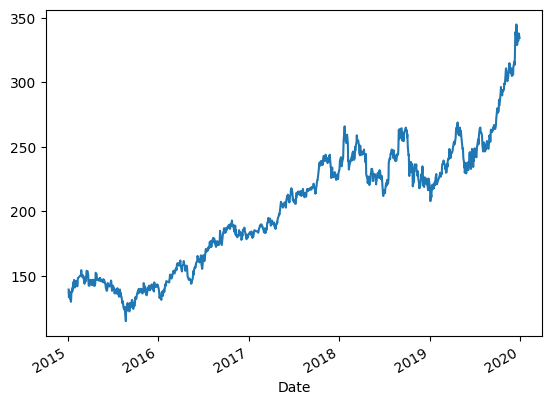

In [12]:
%matplotlib inline
symbol = list(stocks.keys())[0]
stocks[symbol]['Close'].plot()